# Machine Learning: Aprendizaje supervisado


### Problemas modelados utilizando machine learning


El primer paso para aplicar la ciencia de datos y el aprendizaje automático es identificar una pregunta interesante para responder. Según el tipo de respuesta que buscamos, apuntamos directamente a un determinado conjunto de técnicas.

+ Si nuestra pregunta es respondida con *SÍ/NO*, estamos ante un problema de **clasificación**. Los clasificadores también son las técnicas a utilizar si nuestra pregunta admite solo un conjunto discreto de respuestas, es decir, queremos seleccionar entre un número finito de opciones.

    + Dado el perfil de un cliente y la actividad pasada, ¿cuáles son los productos financieros que le interesarían más?
    
    + Dados los resultados de una prueba clínica, ¿este paciente padece diabetes?
    
    + Dada una imagen de resonancia magnética, ¿hay un tumor en ella?
    
    + Dada la actividad pasada asociada a una tarjeta de crédito, ¿la operación actual es un fraude?
    
    + Dadas mis habilidades y calificaciones en ciencias de la computación y matemáticas, ¿aprobaré el curso de procesamiento de datos?

+ Si nuestra pregunta es una predicción de una cantidad (generalmente de valor real), estamos frente a un problema de **regresión**.

    + Dada la descripción de un apartamento, ¿cuál es el valor de mercado esperado del piso? ¿Cuál sería el valor si el apartamento tuviera ascensor?
    
    + Dados los registros anteriores de las actividades de los usuarios en las aplicaciones, ¿cuánto tiempo un determinado cliente está vinculado a nuestra aplicación?
    
    + Dadas mis habilidades y calificaciones en informática y matemáticas, ¿qué calificación obtendré?
    
    
Algunos problemas se pueden resolver mediante regresión y/o clasificación.

### Problema de aprendizaje supervisado

En un problema de clasificación supervisada, dado un conjunto de ejemplos con su etiqueta correspondiente, nuestro objetivo es predecir la pertenencia de una instancia dada a una de un conjunto discreto predefinido de clases.

En el aprendizaje automático solemos hablar de dos pasos diferentes:

+ **Training**. Dado un conjunto de instancias de datos $ x $ y su etiqueta correspondiente $ y $, queremos aprender/ajustar (fit) un modelo.

+ **Test**. Dado un modelo, queremos aplicarlo a nuevos datos no vistos para predecir (predict) su etiqueta (valor).

Para poder analizar algunos algoritmos utilizaremos el siguiente dataset (imágenes de números) de la libraría sklearn.

In [41]:
from sklearn import datasets
digits = datasets.load_digits()

In [42]:
#Separación en variables x e y
X, y = digits.data, digits.target

print (X.shape)
print (y.shape)

(1797, 64)
(1797,)


(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


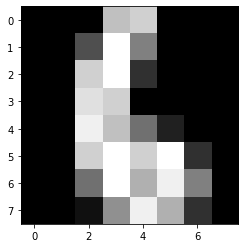

In [43]:
%matplotlib inline
#El dataset digits corresponde a un array que representa números (escritos a mano).

# Verificar la dimensionalidad de los datos
print (X[0].shape)
print (X[0])

# Hacer un reshape para recuperar la imagen
print (X[0].reshape((8,8)))


# Mostrar la imagen
import matplotlib.pyplot as plt

plt.imshow(X[6].reshape((8,8)),cmap="gray",interpolation="nearest");


Ejemplos en nuestro conjunto de datos.

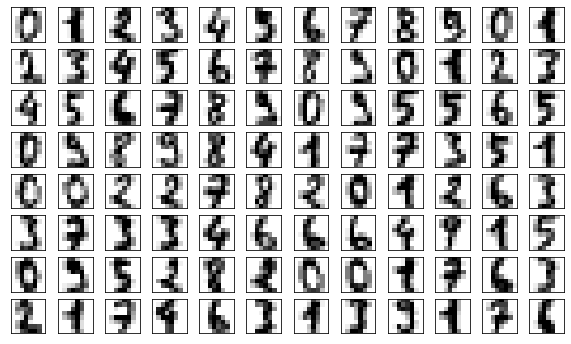

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(8, 12, subplot_kw={'xticks':[], 'yticks':[]})
for i in range(ax.size):
    ax.flat[i].imshow(digits.data[i].reshape(8, 8),
                      cmap=plt.cm.binary)
fig.set_size_inches((10,6))

### Aprender y predecir con Scikit-Learn

Todos los objetos en scikit-learn comparten una API uniforme y limitada que consta de tres interfaces complementarias:

+ una interfaz de estimador para construir y ajustar modelos (.fit ());
+ una interfaz de predicción para hacer predicciones (.predict ());
+ una interfaz de transformador para convertir datos.

Elección de modelo y ajuste de los datos de entrenamiento

In [45]:
# Entrenamiento del calsificador
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [46]:
print(knn)

KNeighborsClassifier(n_neighbors=10)


Para evaluar el rendimiento del clasificador, se puede utilizar la precisión de la predicción:

$$acc  = \frac{\mbox{# of correct predictions}}{N}$$

Cada estimator tiene un método *.score()* que invoca la métrica de puntuación predeterminada. En el caso de k-Vecinos más cercanos, esta es la precisión de clasificación.

In [47]:
# Rendimiento en el conjunto de entrenamiento
knn.score(X,y)

0.9855314412910406

C:\Users\Mateo\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


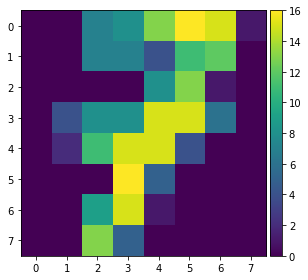

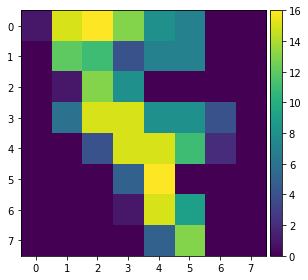

[[2808.  294. 2886.]
 [3670.  313. 3888.]
 [2810.  344. 3512.]
 ...
 [4776.  374. 4734.]
 [3656.  344. 3248.]
 [4422.  392. 4220.]]
(1797, 3)


In [48]:
from skimage import io as io

tmp = X[7].reshape((8,8))    
sym = tmp*tmp[:,::-1]
io.imshow(tmp)
io.show()
io.imshow(tmp[:,::-1])
io.show()

import numpy as np
Xnew = np.zeros((y.shape[0],3))
for i in range(y.shape[0]):
    area = sum(X[i])
    tmp = X[i].reshape((8,8))    
    symH = tmp*tmp[:,::-1]
    symV = tmp*tmp[::-1,:]
    
    Xnew[i,:]=[sum(symH.flatten()), area, sum(symV.flatten())]

print (Xnew)
print (Xnew.shape)

### Training y testing

Check the following code and its result:

In [56]:
#Entrenando un clasificador utilizando .fit()
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

knn.fit(Xnew,y)
yhat=knn.predict(Xnew)

print ("classification accuracy:", metrics.accuracy_score(yhat, y))
plot_confusion_matrix(Xnew, yhat, y)


classification accuracy: 1.0


ValueError: plot_confusion_matrix only supports classifiers

### Selección del modelo


Usando el error esperado en el conjunto de prueba (test set), podemos seleccionar el mejor clasificador para nuestra aplicación. Esto se llama **selección de modelo**. En este ejemplo cubrimos el escenario más simplista. Supongamos que tenemos un conjunto de clasificadores diferentes y queremos seleccionar el "mejor". Podemos utilizar el que arroje la tasa de error más baja.

[Text(1, 0, '1-NN'),
 Text(2, 0, '3-NN'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Decission Tree')]

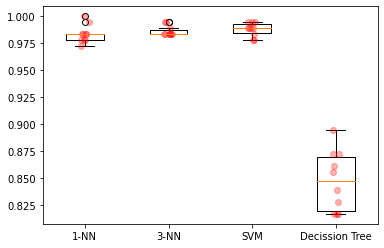

In [10]:
# La división se puede hacer usando las herramientas proporcionadas por sklearn
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
PRC = 0.1
acc_r=np.zeros((10,4))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)


plt.boxplot(acc_r);
for i in range(4):
    xderiv = (i+1)*np.ones(acc_r[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc_r[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])

Para validar el modelo se puede utilizar varias porciones del training set. Una forma muy general es a través de la técnica denominada **cross-validation**. Hay otros tipos de validación cruzada, como **leave-one-out** o **K-fold cross-validation**. 

+ En leave-one-out, dadas $N$ muestras, el modelo se entrena con $N-1$ muestras y se prueba con la restante. Esto se repite $N$ veces, una vez por muestra de entrenamiento y el resultado se promedia.

+ En la K-fold cross-validation, el conjunto de entrenamiento se divide en K divisiones no superpuestas. Las divisiones K-1 se utilizan para el entrenamiento y la restante se utiliza para evaluar la media. Este proceso se repite $K$ veces dejando una división cada vez. Los resultados se promedian. Podemos calcular una aproximación al intervalo de confianza usando este método. 

[Text(1, 0, '1-NN'),
 Text(2, 0, '3-NN'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Decission Tree')]

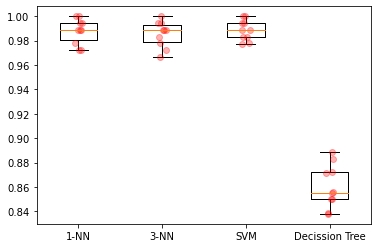

In [11]:
from sklearn import model_selection
#Crear un 10-fold cross validation set
acc = np.zeros((10,4))

kf=model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits()

i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train,y_train)
    nn3.fit(X_train,y_train)
    svc.fit(X_train,y_train)
    dt.fit(X_train,y_train)
    
    yhat_nn1=nn1.predict(X_test)
    yhat_nn3=nn3.predict(X_test)
    yhat_svc=svc.predict(X_test)
    yhat_dt=dt.predict(X_test)
    
    acc[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc[i][3] = metrics.accuracy_score(yhat_dt, y_test)
    i=i+1
    
plt.boxplot(acc);
for i in range(4):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)
    
ax = plt.gca()
ax.set_xticklabels(['1-NN','3-NN','SVM','Decission Tree'])    
    

### Proceso de aprendizaje

Ejemplo con un problema de dos dimensiones.

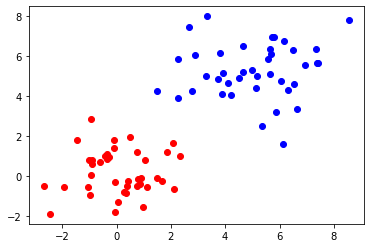

In [12]:
import numpy as np
# Creación de los datos
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r');
plt.scatter(X[40:,0],X[40:,1],color='b');

Para poder aprender, cualquier algoritmo debe definir al menos tres componentes:

+ **La clase de modelo/hipotesis** define la familia de modelos matemáticos que se utilizarán.

La selección del mejor modelo dependerá de nuestro problema y de lo que queramos obtener del problema. El objetivo principal en el aprendizaje suele ser lograr el mínimo error/máximo rendimiento (optimizar). Pero según lo que queramos del algoritmo encontraremos diferentes algoritmos. Otras propiedades deseables comunes son la interpretabilidad, el comportamiento frente a los datos faltantes, el entrenamiento rápido, etc.


+ **El modelo de problema** formaliza y codifica las propiedades deseadas de la solución. En muchos casos, esta formalización toma la forma de un problema de optimización. En su instanciación más básica, el modelo del problema puede ser la **minimización de una función de error **. La función de error mide la diferencia entre nuestro modelo y el objetivo.

    
    
+ **El algoritmo de aprendizaje** es un método o algoritmo de optimización/búsqueda que, dada una clase de modelo, lo ajusta a los datos de entrenamiento de acuerdo con la función de error. Según la naturaleza de nuestro problema, existen muchos algoritmos diferentes. En general, estamos hablando de encontrar la aproximación de error mínimo.

C:\Users\Mateo\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


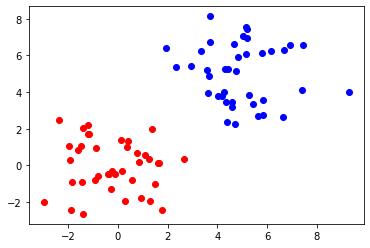

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [13]:
#Ejemplo
%matplotlib inline

import numpy as np
#Creación de los datos
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

import matplotlib.pyplot as plt
from IPython.html.widgets import interact

def human_learning_algorithm(X,y):
    
    plt.scatter(X[0:40,0],X[0:40,1],color='r')
    plt.scatter(X[40:,0],X[40:,1],color='b')
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def hml_display(w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        # Evaluación del modelo para un peso determinado
        Z = data.dot(w)+offset
        Z.shape=sz
        plt.scatter(X[0:40,0],X[0:40,1],color='r')
        plt.scatter(X[40:,0],X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   
    #Ipython 2.0      
    interact(hml_display, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));

    
human_learning_algorithm(X,y)



### Curvas de aprendizaje y overfitting


In [14]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import neighbors

MAXC=50
MAXN=1000
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
perm = np.random.permutation(y.size)
X = X[perm,:]
y = y[perm]


def complexity_number(C,N):
    
    Xr=X[:N,:]
    yr=y[:N]
    idxplus = yr==1
    idxminus = yr==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')   
    delta = 0.05
    xx = np.arange(-5.0, 15.0, delta)
    yy = np.arange(-5.0, 15.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
    # Evaluación del modelo para un peso determinado
    clf = neighbors.KNeighborsClassifier(MAXC-C+1)
    clf.fit(Xr,yr.ravel())
    Z=clf.predict(data)
    Z.shape=sz
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)
   
#Ipython 2.0
interact(complexity_number,  C=(1,MAXC), N = (20,MAXN));
#Ipython 1.1.
#C=1 #1...50
#N = 20 #20...1000
#complexity_number(C,N)

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), IntSlider(value=510, description='N…

### Curvas de aprendizaje

Visualicemos el comportamiento observado. Para este propósito, podemos dibujar una curva del error de entrenamiento y el error de prueba a medida que aumenta el número de datos de entrenamiento para una complejidad dada. Esta curva se llama **curva de aprendizaje **.

Text(0, 0.5, 'Error rate')

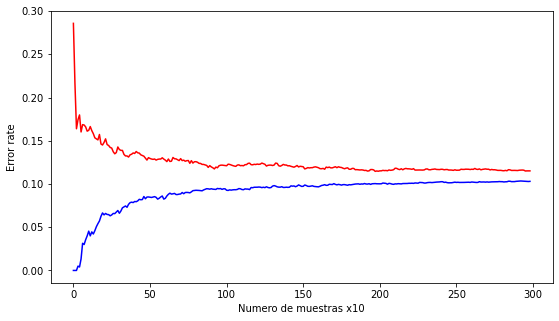

In [24]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import metrics
from sklearn import tree

C=5
MAXN=1000

yhat_test=np.zeros((10,299,2))
yhat_train=np.zeros((10,299,2))
# Repetir diez veces para obtener curvas suaves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Numero de muestras x10')
plt.ylabel('Error rate')

Observando el gráfico anterior podemos ver:

+ A medida que aumenta el número de muestras de entrenamiento, ambos errores tienden al mismo valor, **sesgo (bias)**.
+ Cuando tenemos una pequeña cantidad de datos de entrenamiento, el error de entrenamiento es muy pequeño pero el error de prueba es muy grande.

Comprobemis ahora la curva de aprendizaje cuando la complejidad es menor.

Text(0, 0.5, 'Error rate')

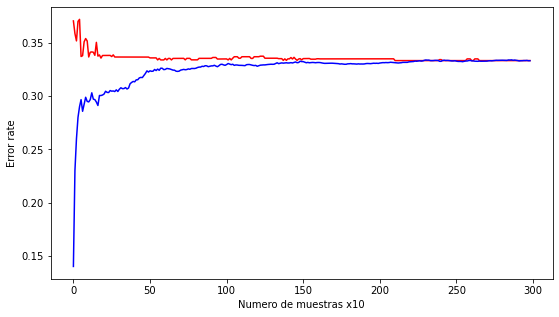

In [25]:
C=1
MAXN=1000

# Repetir diez veces para obtener curvas suaves
for i in range(10):
    X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y = np.concatenate([y,np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
    y_test = np.concatenate([y_test,np.ones((MAXN,1))])
    j=0
    for N in range(10,3000,10):
        Xr=X[:N,:]
        yr=y[:N]
        idxplus = yr==1
        idxminus = yr==-1
        idxplus = idxplus.flatten()
        idxminus = idxminus.flatten()
        #Evaluate the model
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr,yr.ravel())
        yhat_test[i,j,1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j=j+1

plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Numero de muestras x10')
plt.ylabel('Error rate')

Podemos ver un comportamiento similar en esta segunda curva. Comparemos las dos gráficas.

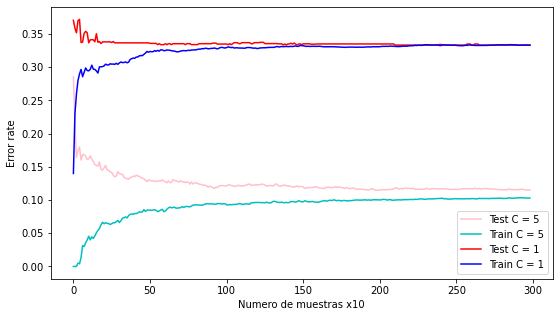

In [26]:
p1,=plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),color='pink')
p2,=plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'c')
p3,=plt.plot(np.mean(yhat_test[:,:,1].T,axis=1),'r')
p4,=plt.plot(np.mean(yhat_train[:,:,1].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Numero de muestras x10')
plt.ylabel('Error rate')
plt.legend([p1,p2,p3,p4],["Test C = 5","Train C = 5","Test C = 1","Train C = 1"])

Aunque ambos muestran un comportamiento similar notamos varias diferencias:

+ Con una pequeña complejidad, los errores de entrenamiento y prueba convergen antes, con una menor cantidad de datos.
+ Sin embargo, con pequeña complejidad, el error de convergencia es mayor que con mayor complejidad.

### Overfitting.

Tracemos ahora el comportamiento de aprendizaje para un número fijo de ejemplos con respecto a la complejidad del modelo.

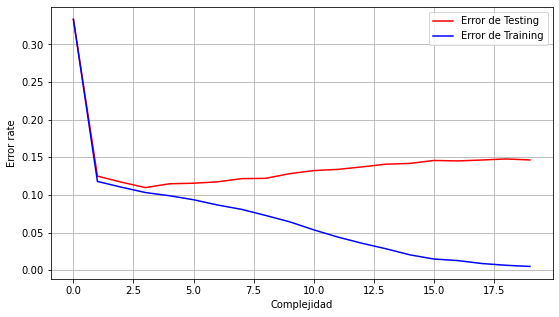

In [33]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import metrics
from sklearn import tree

MAXC=20
N=1000
NTEST=4000
ITERS=3

yhat_test=np.zeros((ITERS,MAXC,2))
yhat_train=np.zeros((ITERS,MAXC,2))
# Repetir diez veces para obtener curvas suaves
for i in range(ITERS):
    X = np.concatenate([1.25*np.random.randn(N,2),5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X,[8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)),-np.ones((N,1))])
    y = np.concatenate([y,np.ones((N,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    X_test = np.concatenate([1.25*np.random.randn(NTEST,2),5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test,[8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)),-np.ones((NTEST,1))])
    y_test = np.concatenate([y_test,np.ones((NTEST,1))])
    
    idxplus = y==1
    idxminus = y==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    j=0
    for C in range(1,MAXC+1):
        #Evaluar el modelo
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X,y.ravel())
        yhat_test[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i,j,0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j=j+1

p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1),'r')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1),'b')
fig = plt.gcf()
fig.set_size_inches(9,5)
plt.xlabel('Complejidad')
plt.ylabel('Error rate')
plt.legend([p1, p2], ["Error de Testing", "Error de Training"])
plt.grid(True)

Observe que a medida que aumenta la complejidad, el error de entrenamiento se reduce, pero por encima de cierto nivel de complejidad aumenta el error de prueba. Este efecto se llama **overfitting (sobreajuste)**.

### Models in Machine Learning



### Naive Bayes

En este ejemplo, el clasificador Naive Bayes se introduce al estudiar el caso de la clasificación de documentos como una instancia simple de un problema de procesamiento del lenguaje natural.

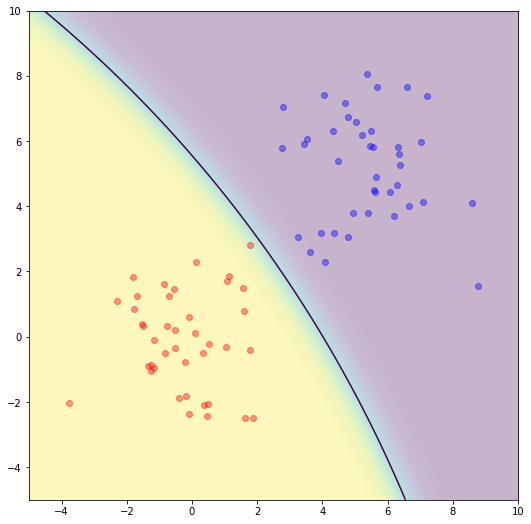

In [34]:

%reset -f
%matplotlib inline
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Creación de la data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

nb = GaussianNB()
nb.fit(X,y.ravel())

# Creacion de la cuadrícula para fines de visualización
delta = 0.025
xx = np.arange(-5.0, 10.0, delta)
yy = np.arange(-5.0, 10.0, delta)
XX, YY = np.meshgrid(xx, yy)

Z=nb.predict_proba(np.c_[XX.ravel(), YY.ravel()])
Z = Z[:,1].reshape(XX.shape)

plt.figure()
idxplus = y==1
idxminus = y==-1
idxplus = idxplus.flatten()
idxminus = idxminus.flatten()
plt.scatter(X[idxplus,0],X[idxplus,1],color='r',alpha=0.4)
plt.scatter(X[idxminus,0],X[idxminus,1],color='b',alpha=0.4)
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(XX,YY,Z,[0.5])
fig = plt.gcf()
fig.set_size_inches(9,9)

### Support Vector Machines


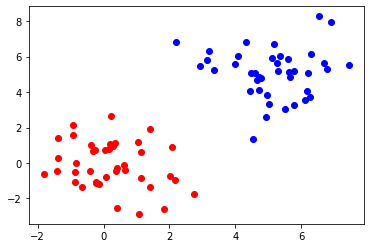

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [35]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));


Comprobemos el resultado de ajustar un clasificador SVM usando sklearn.

Numero de vectores de soporte: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.69764740799983


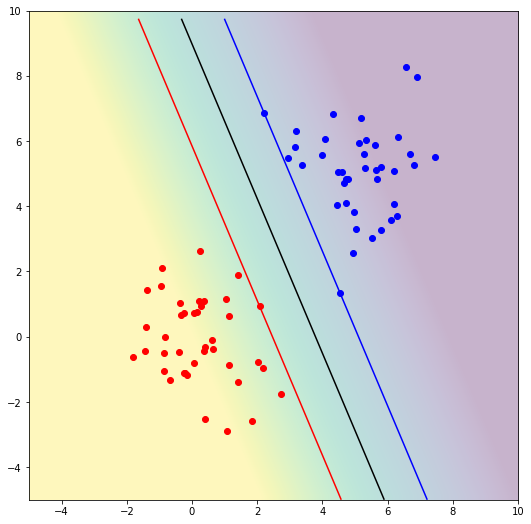

In [36]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
from sklearn import svm

class svm_example():
    def __init__(self):
        '''Creación de la Data'''
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM'''
        self.clf = svm.SVC(kernel='linear')
        self.clf.fit(self.X,self.y.ravel())
        
    def display(self):
        '''Display stuff'''
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz=XX.shape
        data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
        Z=self.clf.decision_function(data)
        Z.shape=sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-3, vmax=3)
        XX = data[:,0].reshape(sz)
        YY = data[:,1].reshape(sz)
        plt.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
        print ('Numero de vectores de soporte: ' + str(np.sum(self.clf.n_support_)))
        plt.scatter(self.clf.support_vectors_[:, 0], 
           self.clf.support_vectors_[:, 1], 
           s=120, 
           facecolors='none', 
           linewidths=2,
           zorder=10)
        print ('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print ('offset = ' + str(10*self.clf.intercept_[0]))
        return XX,YY,Z

c = svm_example()
c.run()
XX,YY,Z=c.display()

Observe que hay un subconjunto crítico de puntos de datos. Estos se denominan **Vectores de soporte**. Si alguno de esos puntos desaparece, el límite cambia. El límite de decisión depende de los vectores de soporte, por lo que tenemos que almacenarlos en nuestro modelo.

In [37]:
# Visualizacion en 3D

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(1)
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
def control3D(elevation,azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,alpha=0.3,linewidth=0)
    ax.scatter(X[0:40,0],X[0:40,1],1,color='r')
    ax.scatter(X[40:,0],X[40:,1],-1,color='b')
    ax.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
    ax.view_init(elev=elevation, azim=azimuth)

#Ipython 2.0
interact(control3D,elevation=(0.,90.),azimuth=(0,360))
#Ipython 1.1
#elevation = 45
#azimuth = 180
#control3D(elevation,azimuth)

interactive(children=(FloatSlider(value=45.0, description='elevation', max=90.0), IntSlider(value=180, descrip…

<function __main__.control3D(elevation, azimuth)>